                              station_id            lga_name  average_vehicles
0   fd9971b2-130e-4163-b56c-a37beadc7846        Moreland (C)          1.293285
1   ed97e7b3-1ce6-4c6c-bb45-7f42ef305620          Alpine (S)          1.608672
2                     Location not found         Ararat (RC)          1.636914
3   e47fa291-45de-4b06-b6ac-6bb8bf6421f8        Ballarat (C)          1.573592
4   fd9971b2-130e-4163-b56c-a37beadc7846         Banyule (C)          1.634845
..                                   ...                 ...               ...
75  15b90658-97fe-42a4-8bb8-cfc5cc90cdc9         Wyndham (C)          1.712150
76  4afe6adc-cbac-4bf1-afbe-ff98d59564f9           Yarra (C)          0.998520
77  fc15d85f-4141-4949-b2ef-e93c5c825205    Yarra Ranges (S)          1.917149
78  5e9e5f47-e85b-493e-9b39-e6b5f282bc61    Yarriambiack (S)          1.704324
79                    Location not found  Unincorporated Vic          0.659517

[80 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

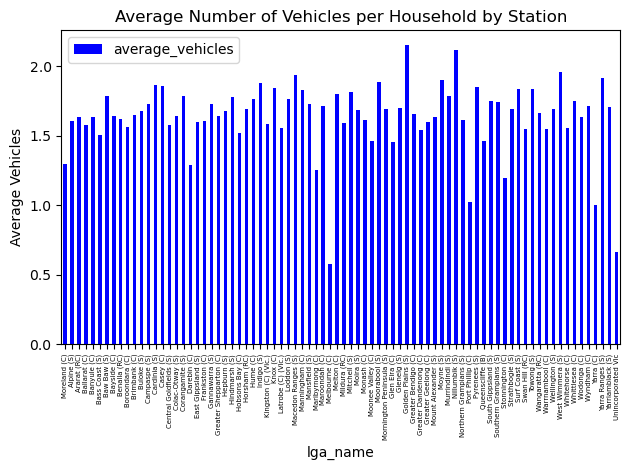

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


def load_local_data(file_path):
    return pd.read_json("/Users/frank/PycharmProjects/comp90024_ass2/database/vehicleFinalData.json")

def calculate_average_vehicles(df):
    df['weighted_vehicles'] = (
            df['none_vehicle_per_dwelling'] * 0 +
            df['one_vehicle_per_dwelling'] * 1 +
            df['two_vehicle_per_dwelling'] * 2 +
            df['three_vehicle_per_dwelling'] * 3 +
            df['more_than_four_vehicle_per_dwelling'] * 4
    )
    df['average_vehicles'] = df['weighted_vehicles'] / df['total_dwelling']
    return df[['station_id', 'lga_name', 'average_vehicles']]


def main():
    data_path = '/Users/frank/PycharmProjects/comp90024_ass2/database/vehicleFinalData.json'  # Path to the local JSON file
    data = load_local_data(data_path)
    result = calculate_average_vehicles(data)
    print(result)

    # Optionally, save the result to a CSV file
    result.to_csv('average_vehicles_per_station.csv', index=False)

    # # Or plot the data
    # # result['average_vehicles'].plot(kind='bar')
    #
    # plt.figure(figsize=(12, 6))  # Larger figure size
    #
    # ax = data['average_vehicles'].plot(kind='bar', color='blue')
    #
    # plt.ylabel('Average Vehicles')
    # plt.title('Average Number of Vehicles per Household by Station')
    # plt.tight_layout()  # Automatically adjust layout
    # plt.show()

 # Plot the data
    plt.figure(figsize=(12, 6))  # Correct placement for setting figure size
    ax = result.plot(kind='bar', color='blue', x='lga_name', y='average_vehicles')  # Use result DataFrame for plotting
    ax.set_ylabel('Average Vehicles')
    ax.set_title('Average Number of Vehicles per Household by Station')
    ax.set_xticklabels(result['lga_name'], rotation=90, fontsize = 5)  # Ensure the x-axis labels are the names and are rotated for better readability

    plt.tight_layout()  # Automatically adjust layout
    plt.show()


if __name__ == "__main__":
    main()
